<a href="https://colab.research.google.com/github/aksingh21/Probabilistic-Programming-PyMC3/blob/master/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#PyMC3 Tutorial using Linear Regression
#Example from https://docs.pymc.io/notebooks/getting_started.html

import numpy as np
import matplotlib.pyplot as plt

In [0]:
#LINEAR REGRESSION
#Generating Data 
#Initialize Random number generator
np.random.seed(123)

#True parameter Value
alpha, sigma = 1,1
beta = [1, 2.5]

#Size of dataset
size = 1000

#Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)


#Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [0]:
#Model Specification
from pymc3 import Model, Normal, HalfNormal

basic_model = Model()

with basic_model:
  
  #Priors for unknown model parameters
  alpha = Normal('alpha', mu=0, sd=10)
  beta = Normal('beta', mu=0, sd=10,shape=2)
  sigma = HalfNormal('sigma',sd=1)
  
  
  #Expected value of outcome
  mu = alpha + beta[0]*X1 + beta[1]*X2
  Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed = Y)

In [45]:
#Model Fitting

#Maximum a posterior methods

from pymc3 import find_MAP

map_estimate = find_MAP(model = basic_model)

print(map_estimate)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1,442.7, ||grad|| = 96.346: 100%|██████████| 21/21 [00:00<00:00, 872.66it/s]  

{'alpha': array(1.01332041), 'beta': array([1.34058247, 0.26811649]), 'sigma_log__': array(-0.0001768), 'sigma': array(0.99982322)}


In [33]:
#Alternative optimizer method for finding the MAP
#Default method of finding MAP is Broyden-Fletcher-Goldfarb-Shanno


from scipy import optimize
map_estimate = find_MAP(model=basic_model, fmin= optimize.fmin_powell)

print(map_estimate)


/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:102: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -164.5:   5%|▌         | 271/5000 [00:00<00:02, 1704.16it/s]

Optimization terminated successfully.
         Current function value: 164.496957
         Iterations: 6
         Function evaluations: 271
{'alpha': array(1.01761779), 'beta': array([1.51424081, 0.03486478]), 'sigma_log__': array(0.11323002), 'sigma': array(1.1198895)}


In [46]:
from pymc3 import NUTS,sample

with basic_model:
  #obtain starting point via MAP
  start = find_MAP(fmin=optimize.fmin_powell)
  step = NUTS(scaling=start)
  trace = sample(2000, step, start=start)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:102: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -1,429.7:   5%|▌         | 274/5000 [00:00<00:01, 2416.64it/s]


Optimization terminated successfully.
         Current function value: 1429.666886
         Iterations: 6
         Function evaluations: 274


Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|██████████| 2500/2500 [00:21<00:00, 115.09it/s]
The number of effective samples is smaller than 25% for some parameters.


In [47]:
trace['alpha'][-5:]

array([0.97418882, 1.04073092, 1.00113037, 0.99731661, 1.0507523 ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f1233cd30>,
      dtype=object)

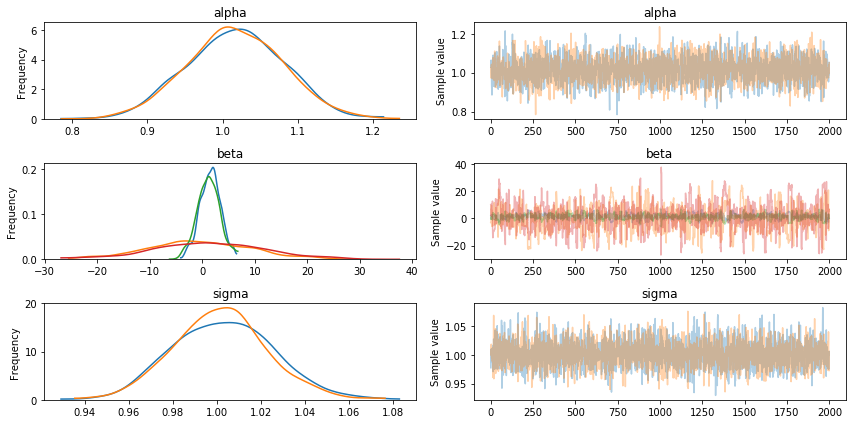

In [48]:
#Posterior Analysis
from pymc3 import traceplot
traceplot(trace)

In [49]:
from pymc3 import summary
summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.016070,0.063369,0.001333,0.895739,1.141570,2482.047043,0.999756
beta__0,1.327755,2.049848,0.086254,-2.516390,5.844517,461.445379,1.008362
beta__1,0.312685,10.236826,0.432059,-22.088963,19.427502,461.515220,1.008494
sigma,1.002139,0.022017,0.000378,0.958940,1.044414,3910.817857,1.000829
